In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical 
from keras.layers import Conv2D, MaxPool2D, MaxPooling2D, Flatten, Dense, Dropout, LeakyReLU, RandomRotation
from keras.models import Sequential
from keras.preprocessing import image
from keras.layers import BatchNormalization
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime

import tensorflow as tf

2023-05-17 01:52:30.722938: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


2023-05-17 01:52:32.135401: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-17 01:52:32.139764: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-17 01:52:32.140984: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

# Definitions

In [3]:
WIDTH, HEIGHT = IMAGE_SIZE = (256, 256)
DEPTH = 3
DATASET_PATH = "dataset"
EPOCS = 50

# Data Preprocessing

### Preprocessing the Training set

In [4]:
training_datagen = ImageDataGenerator(rescale = 1./255,
                                       shear_range = 0.2,
                                       horizontal_flip = True,
                                       vertical_flip = True,
                                       width_shift_range = 0.2,
                                       height_shift_range = 0.2,
                                       rotation_range = 30,
                                       validation_split = 0.2)

training_set = training_datagen.flow_from_directory(DATASET_PATH,
                                                     target_size=IMAGE_SIZE,
                                                     batch_size=32,
                                                     seed=11,
                                                     class_mode = 'sparse',
                                                     subset = "training")
test_set = training_datagen.flow_from_directory(DATASET_PATH,
                                                     target_size=IMAGE_SIZE,
                                                     batch_size=32,
                                                     seed=11,
                                                     class_mode = 'sparse',
                                                     subset = "validation")

Found 81 images belonging to 5 classes.
Found 18 images belonging to 5 classes.


In [5]:
class_indices = training_set.class_indices
num_classes = len(class_indices)
train_labels = training_set.classes
train_labels = to_categorical(train_labels, num_classes=len(class_indices))
class_indices

{'9v': 0, 'AA': 1, 'AAA': 2, 'D': 3, 'Unknown': 4}

# Building the CNN


In [6]:
model = Sequential()
model.add(RandomRotation(0.1))
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(HEIGHT, WIDTH, DEPTH)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes))

2023-05-17 01:52:32.231387: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-17 01:52:32.236333: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-17 01:52:32.237668: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [7]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Step 2- Adding a second convolutional layer

### Step 3 - Flattening

### Step 4 - Full Connection

### Step 5 - Output Layer

# Part 3 - Training the CNN

### Compiling the CNN

### Training the CNN on the Training set and evaluating it on the Test set

In [8]:
history = model.fit(x = training_set, validation_data = test_set, epochs = EPOCS)

2023-05-17 01:52:36.578565: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600


Epoch 1/50


2023-05-17 01:52:37.302933: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-05-17 01:52:37.811300: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2023-05-17 01:52:38.454953: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x33997200 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-05-17 01:52:38.454982: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce RTX 2060 SUPER, Compute Capability 7.5
2023-05-17 01:52:38.459923: I tensorflow/compiler/mlir/ten

3/3 [==============================] - ETA: 0s - loss: 4.0056 - accuracy: 0.2840

2023-05-17 01:52:40.796602: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


3/3 [==============================] - 4s 656ms/step - loss: 4.0056 - accuracy: 0.2840 - val_loss: 1.7139 - val_accuracy: 0.3889
Epoch 2/50
3/3 [==============================] - 1s 358ms/step - loss: 1.5664 - accuracy: 0.3580 - val_loss: 1.5237 - val_accuracy: 0.2778
Epoch 3/50
3/3 [==============================] - 1s 285ms/step - loss: 1.4851 - accuracy: 0.2840 - val_loss: 1.4163 - val_accuracy: 0.2222
Epoch 4/50
3/3 [==============================] - 1s 343ms/step - loss: 1.3615 - accuracy: 0.3086 - val_loss: 1.2523 - val_accuracy: 0.5000
Epoch 5/50
3/3 [==============================] - 1s 356ms/step - loss: 1.3020 - accuracy: 0.3210 - val_loss: 1.1442 - val_accuracy: 0.3889
Epoch 6/50
3/3 [==============================] - 1s 276ms/step - loss: 1.0159 - accuracy: 0.5556 - val_loss: 0.7595 - val_accuracy: 0.7778
Epoch 7/50
3/3 [==============================] - 1s 344ms/step - loss: 0.8635 - accuracy: 0.6420 - val_loss: 0.8534 - val_accuracy: 0.6111
Epoch 8/50
3/3 [===============

1/1 - 0s - loss: 0.1101 - accuracy: 0.8889 - 163ms/epoch - 163ms/step


2023-05-17 01:53:24.022687: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


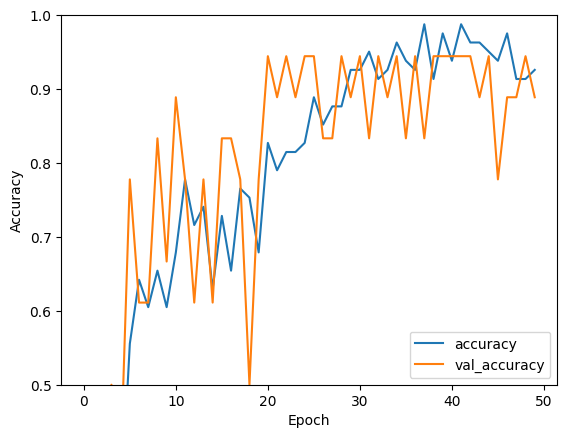

In [9]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_set, verbose=2)

In [10]:
print(test_acc)

0.8888888955116272


# Saving the model

In [11]:
model.save(f'models/model_w{WIDTH}_e{EPOCS}_{datetime.now().isoformat()}')

2023-05-17 01:53:24.420104: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'random_rotation_input' with dtype float and shape [?,256,256,3]
	 [[{{node random_rotation_input}}]]
2023-05-17 01:53:24.474488: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,256,256,3]
	 [[{{node inputs}}]]
2023-05-17 01:53:24.489085: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'random_rotation_input' with dtype float

INFO:tensorflow:Assets written to: models/model_w256_e50_2023-05-17T01:53:24.311230/assets


INFO:tensorflow:Assets written to: models/model_w256_e50_2023-05-17T01:53:24.311230/assets
